In [9]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline 


In [10]:
df = pd.read_excel('C:\\Users\\micka\\Desktop\\Cours Raleigh\\Finance Practical Training Epsilon\\Epsilon Internship\\security_returns_2016-2020.xlsx')
df = pd.DataFrame(df)
df.dropna(inplace=True)
df = df.iloc[: , 1:]

df = df.loc[~(df==0).all(axis=1)]
df.dropna(inplace=True)

df.head(10000)

,B19ST9-R,B3DVXC-R,B4L66G-R,B4PGFJ-R,B4PMRP-R,B5R36P-R,B5R37P-R,B6V0BZ-R,B6ZP8C-R,B5TG5C-R,...,XKPH9J-R,XKT8J2-R,XKTZWR-R,XLT03X-R,XLV24X-R,XLY63V-R,XM8P7T-R,XMYTFJ-R,XNRMXZ-R,XQCN4R-R
0,-0.022506,-0.022506,-0.012232,-0.009058,-0.003742,-0.003742,-0.005235,-0.011140,-0.004245,-0.005585,...,0.006835,-0.000285,-0.014725,-0.014796,-0.005646,-0.010244,0.026135,-0.004416,0.007468,0.022779
4,-0.016497,-0.032496,-0.023529,-0.031824,-0.007410,0.000000,-0.008924,-0.019931,0.005292,-0.008716,...,-0.002172,0.006567,0.000000,-0.030333,-0.008517,-0.012020,0.023459,-0.013139,-0.026531,0.022272
5,0.014963,0.024427,-0.000634,-0.018647,-0.005215,0.000000,0.011197,0.004421,0.024857,0.021688,...,0.013743,0.013143,-0.007473,-0.016303,-0.017895,-0.001352,0.020301,0.004325,-0.000401,-0.015686
6,-0.006301,-0.080477,-0.009518,-0.009984,-0.015728,0.000000,-0.005822,-0.009432,-0.002140,0.005928,...,-0.022953,-0.009146,-0.029229,-0.012741,-0.044461,-0.015228,-0.051990,-0.023052,-0.030874,-0.109340
7,-0.025963,-0.090762,-0.023062,-0.013663,-0.017120,0.000000,-0.014353,-0.015742,-0.028596,-0.017300,...,-0.018547,-0.033720,0.013230,-0.030217,-0.031274,-0.017010,-0.035207,-0.024200,-0.028961,-0.034294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0.007131,-0.002816,-0.003094,0.000437,0.000000,0.000000,0.000000,-0.002161,0.018602,0.010420,...,-0.008036,0.007473,-0.006682,-0.010641,-0.014460,0.007122,0.000000,-0.000949,-0.031039,-0.016181
1824,-0.000960,-0.006454,0.008534,0.050655,0.000000,0.000000,0.000000,-0.005401,-0.008659,0.011131,...,0.011618,0.004472,-0.030269,0.031559,0.003386,0.001825,-0.013738,-0.002921,-0.018106,-0.012336
1825,0.000481,0.004466,-0.024615,-0.016625,0.000000,0.000000,0.000000,0.003528,0.003335,-0.012951,...,-0.015488,-0.000905,-0.020424,-0.017698,-0.007874,-0.003871,-0.005132,-0.002564,-0.026950,0.004996
1826,0.002581,0.072353,0.021293,0.028741,0.000000,0.000000,0.000000,0.008900,0.009813,0.005084,...,0.022260,-0.005217,0.018883,0.030028,0.004535,0.005943,0.000000,-0.000367,0.018950,0.019884


In [11]:
# remove special character
df.columns = df.columns.str.replace('-', '')
df.to_excel("C:\\Users\\micka\\Desktop\\Cours Raleigh\\Finance Practical Training Epsilon\\Epsilon Internship\\With0andHyphensDel.xlsx", 
             index=False)
df.head(10000)

,B19ST9R,B3DVXCR,B4L66GR,B4PGFJR,B4PMRPR,B5R36PR,B5R37PR,B6V0BZR,B6ZP8CR,B5TG5CR,...,XKPH9JR,XKT8J2R,XKTZWRR,XLT03XR,XLV24XR,XLY63VR,XM8P7TR,XMYTFJR,XNRMXZR,XQCN4RR
0,-0.022506,-0.022506,-0.012232,-0.009058,-0.003742,-0.003742,-0.005235,-0.011140,-0.004245,-0.005585,...,0.006835,-0.000285,-0.014725,-0.014796,-0.005646,-0.010244,0.026135,-0.004416,0.007468,0.022779
4,-0.016497,-0.032496,-0.023529,-0.031824,-0.007410,0.000000,-0.008924,-0.019931,0.005292,-0.008716,...,-0.002172,0.006567,0.000000,-0.030333,-0.008517,-0.012020,0.023459,-0.013139,-0.026531,0.022272
5,0.014963,0.024427,-0.000634,-0.018647,-0.005215,0.000000,0.011197,0.004421,0.024857,0.021688,...,0.013743,0.013143,-0.007473,-0.016303,-0.017895,-0.001352,0.020301,0.004325,-0.000401,-0.015686
6,-0.006301,-0.080477,-0.009518,-0.009984,-0.015728,0.000000,-0.005822,-0.009432,-0.002140,0.005928,...,-0.022953,-0.009146,-0.029229,-0.012741,-0.044461,-0.015228,-0.051990,-0.023052,-0.030874,-0.109340
7,-0.025963,-0.090762,-0.023062,-0.013663,-0.017120,0.000000,-0.014353,-0.015742,-0.028596,-0.017300,...,-0.018547,-0.033720,0.013230,-0.030217,-0.031274,-0.017010,-0.035207,-0.024200,-0.028961,-0.034294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0.007131,-0.002816,-0.003094,0.000437,0.000000,0.000000,0.000000,-0.002161,0.018602,0.010420,...,-0.008036,0.007473,-0.006682,-0.010641,-0.014460,0.007122,0.000000,-0.000949,-0.031039,-0.016181
1824,-0.000960,-0.006454,0.008534,0.050655,0.000000,0.000000,0.000000,-0.005401,-0.008659,0.011131,...,0.011618,0.004472,-0.030269,0.031559,0.003386,0.001825,-0.013738,-0.002921,-0.018106,-0.012336
1825,0.000481,0.004466,-0.024615,-0.016625,0.000000,0.000000,0.000000,0.003528,0.003335,-0.012951,...,-0.015488,-0.000905,-0.020424,-0.017698,-0.007874,-0.003871,-0.005132,-0.002564,-0.026950,0.004996
1826,0.002581,0.072353,0.021293,0.028741,0.000000,0.000000,0.000000,0.008900,0.009813,0.005084,...,0.022260,-0.005217,0.018883,0.030028,0.004535,0.005943,0.000000,-0.000367,0.018950,0.019884


In [12]:
df2 = pd.read_excel('C:\\Users\\micka\\Desktop\\Cours Raleigh\\Finance Practical Training Epsilon\\Epsilon Internship\\factor_returns_2016-2020.xlsx')
df2.head(10000)

,datadate,size,value,momo,automobiles_and_components,banks,capital_goods,commercial_and_professional_services,consumer_durables_and_apparel,consumer_services,...,media_and_entertainment,pharmaceuticals_biotechnology_and_life_sciences,real_estate,retailing,semiconductors_and_semiconductor_equipment,software_and_services,technology_hardware_and_equipment,telecommunication_services,transportation,utilities
0,2015-12-31,-0.002783,0.003389,-0.009523,-0.008559,-0.010414,-0.007214,-0.010633,-0.006570,-0.009961,...,-0.010092,-0.009218,-0.007674,-0.011010,-0.015185,-0.012740,-0.015393,-0.009821,-0.004536,-0.010714
1,2016-01-04,-0.008599,0.009767,-0.016961,-0.021316,-0.024919,-0.011678,-0.021252,-0.011260,-0.019104,...,-0.020746,-0.022428,-0.011579,-0.019783,-0.010319,-0.019442,-0.006536,-0.006095,-0.019638,-0.003615
2,2016-01-05,-0.003295,-0.001216,0.006799,-0.019889,0.000433,0.000424,0.005156,0.006405,0.000829,...,-0.002605,0.004401,0.018060,0.002815,-0.009470,0.001752,-0.016245,0.010280,0.000582,0.007416
3,2016-01-06,-0.002806,-0.002410,0.017089,-0.033276,-0.014968,-0.014649,-0.009108,-0.017341,-0.013434,...,0.000632,-0.011822,-0.005476,-0.012308,-0.024313,-0.012195,-0.018630,-0.005191,-0.018188,-0.001562
4,2016-01-07,-0.007718,-0.002633,0.008550,-0.036456,-0.033495,-0.029593,-0.018816,-0.023778,-0.028457,...,-0.022014,-0.022909,-0.020816,-0.018684,-0.035329,-0.025889,-0.037027,-0.013371,-0.029884,-0.008163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,2020-12-24,-0.005193,0.000330,-0.000704,0.014472,-0.004979,-0.000058,0.003277,0.002344,-0.001977,...,0.001367,-0.001211,0.008751,-0.001791,0.007843,0.005849,0.005994,-0.000961,-0.000878,0.006425
1256,2020-12-28,-0.008812,0.009408,-0.006152,0.001665,0.006346,-0.001478,0.011315,-0.006805,0.009082,...,0.018829,-0.005208,0.007017,0.017859,-0.003290,-0.001159,0.028784,-0.001184,-0.000046,0.005005
1257,2020-12-29,-0.014946,0.004459,-0.005642,0.000427,-0.008533,-0.007853,-0.009344,-0.009567,-0.001897,...,-0.001132,-0.000918,-0.008685,0.002678,-0.000185,-0.005331,-0.013504,-0.001871,-0.007008,-0.001904
1258,2020-12-30,0.008729,-0.000223,-0.001882,0.034567,0.005633,0.010284,0.003462,0.006252,0.004153,...,-0.007049,0.003421,0.004456,-0.005267,0.014679,0.000361,-0.005190,-0.005859,0.003798,0.005568


In [13]:
def market_beta(X,Y,N):
    """ 
    X = The dependent variable which is the Stock
    Y = The independent variable which is the Market
    N = The length of the Window
     
    It returns the alphas and the betas of
    the rolling regression
    """
     
    # all the observations
    obs = len(X)
     
    # initiate the betas with null values
    betas = np.full(obs, np.nan)
     
    # initiate the alphas with null values
    alphas = np.full(obs, np.nan)
     
     
    for i in range((obs-N)):
        regressor = LinearRegression()
        regressor.fit(X.to_numpy()[i : i + N+1].reshape(-1,1), Y.to_numpy()[i : i + N+1])
        #regressor.fit(X.to_numpy()[i : i + N+1].reshape(-1,1), Y.to_numpy()[i : i + N+1])
        
        betas[i+N]  = regressor.coef_[0]
        alphas[i+N]  = regressor.intercept_
 
    return(alphas, betas)

results = market_beta(df.B19ST9R,df.B3DVXCR, 252)
results = pd.DataFrame(list(zip(*results)), columns = ['alpha', 'beta'])
 
results

,alpha,beta
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1255,0.002889,0.496845
1256,0.002811,0.497027
1257,0.002875,0.497146
1258,0.003158,0.497538


Text(0.5, 1.0, 'Beta of 2 stocks:B19ST9R vs B3DVXCR with Rolling Window of 252 Days')

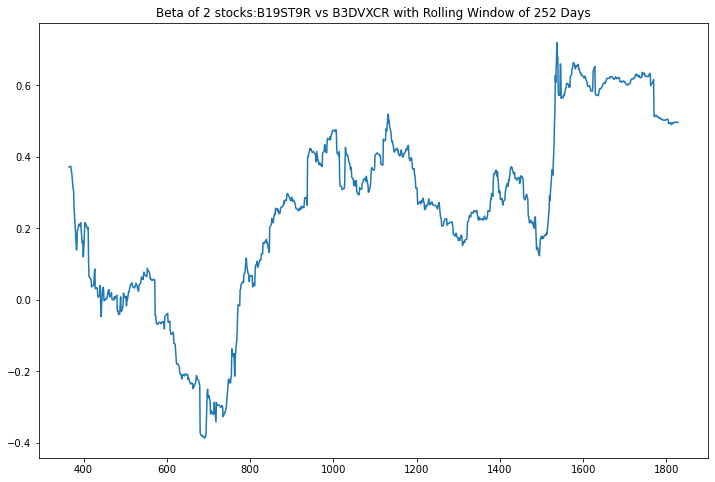

In [14]:
#results.index = amzn.index
results.index = df.index
plt.figure(figsize=(12,8))
results.beta.plot.line()
plt.title("Beta of 2 stocks:B19ST9R vs B3DVXCR with Rolling Window of 252 Days")